Implement the k-means clustering algorithm from scratch. Ensure that your im-
plementation includes:

In [355]:
import numpy as np
import matplotlib.pyplot as plt

In [356]:
X = np.array([
    [5.1, 3.5],[4.9, 3.0],[5.8, 2.7],[6.0, 3.0],[6.7, 3.1],[4.5, 2.3],[6.1, 2.8],[5.2, 3.2],[5.5, 2.6],[5.0, 2.0],[8.0, 0.5],[7.5, 0.8],[8.1, -0.1],[2.5, 3.5],[1.0, 3.0],[4.5, -1.0],[3.0, -0.5],[5.1, -0.2],[6.0, -1.5],[3.5, -0.1],[4.0, 0.0],[6.1, 0.5],[5.4, -0.5],[5.3, 0.3],[5.8, 0.6]
])
u1 = np.array([3.0, 3.0])
u2 = np.array([2.0, 2.0])

### a) Implement the k-means clustering algorithm from scratch. Ensure that your im-plementation includes:
- (a) (1 point) Initialization: Use the given centroids as starting points.
- (b) (2 points) Assignment: Assign each data point to the nearest centroid based on the Euclidean distance.
- (c) (2 points) Update: Recalculate the centroids after each assignment by computing the mean of all points assigned to each centroid.
- (d) (1 point) Convergence Check: Terminate the algorithm if centroids do not significantly change between iterations or after a maximum of 100 iterations. Use a convergence threshold of 1e-4.

In [357]:
def compute_centroids(X, cluster_labels, k, old_centroids):
    k = np.array([
        X[cluster_labels == i].mean(axis=0) if len(X[cluster_labels == i]) > 0 else old_centroids[i]
        for i in range(k)
    ])
    return k 


def asn_cluster(distances):
    return np.argmin(distances, axis=1)



def distance(X, centroids):
    return np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

def check_convergence(old_centroids, new_centroids, tolerance):
    p = np.allclose(old_centroids, new_centroids, atol=tolerance)
    return p





In [358]:
def KMeans(X, initial_centroids, k=2, max_iterations=100, tolerance=1e-4):
    k=2
    max_iterations=100
    tolerance=1e-4
    centroids = initial_centroids.copy()
    for iteration in range(max_iterations):
        distances = distance(X, centroids)
        cluster_labels = asn_cluster(distances)
        
        new_centroids = compute_centroids(X, cluster_labels, k, centroids)
        
        if check_convergence(centroids, new_centroids, tolerance):
            print(f"Converged after {iteration + 1} iterations.Final centroids: {new_centroids}")
            break
        
        centroids = new_centroids
    else:
        print("Didn't converge within the max number of iterations.")
    
    return centroids, cluster_labels

In [359]:
initialization = np.array([u1, u2])
final_centroids, cluster_assignments = KMeans(X, initialization)


print("\nCluster Assignment: ")
print(cluster_assignments)




print("Final Centroid:")
print(final_centroids)


Converged after 3 iterations.Final centroids: [[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]

Cluster Assignment: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0]
Final Centroid:
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]


### b) Find the values of final centroids after the algorithm converges. Plot the two clusters at the start of the process and at the end.

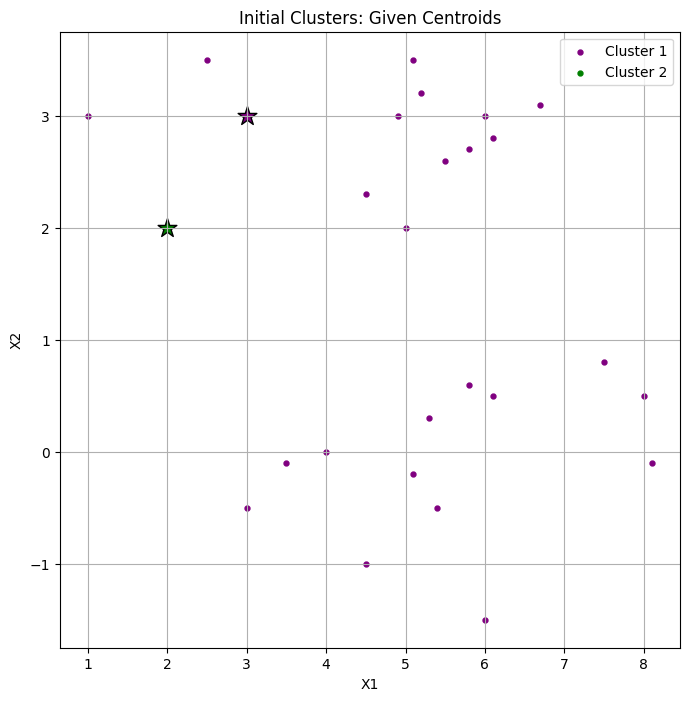

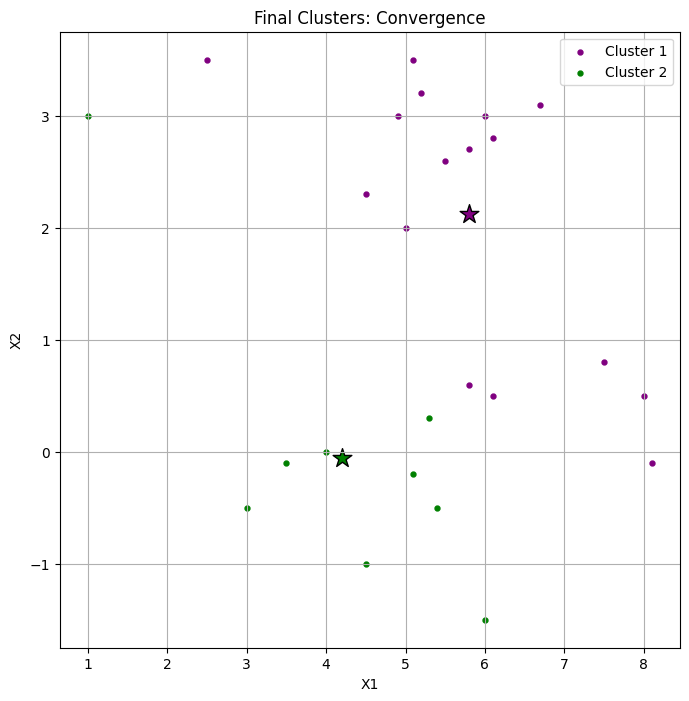

In [360]:
import numpy as np
import matplotlib.pyplot as plt

def plot_individual_cluster(points, centroid, cluster_index, color):
    plt.scatter(points[:, 0], points[:, 1], s=50, c=color, marker='.', label=f'Cluster {cluster_index+1}')
    plt.scatter(centroid[0], centroid[1], s=200, c=color, marker='*', edgecolors='k')

def setup_plot(title, xlabel, ylabel):
    plt.figure(figsize=(8, 8))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

def plot_clusters(X, centroids, cluster_labels, title):
    setup_plot(title, 'X1', 'X2')
    colors = ['purple', 'g']
    for i in range(len(centroids)):
        points = X[cluster_labels == i]
        plot_individual_cluster(points, centroids[i], i, colors[i])
    plt.legend()
    plt.savefig(title + '.png')
    plt.show()

initial_labels = np.zeros(len(X), dtype=int)

plot_clusters(X, initialization, initial_labels, 'Initial Clusters: Given Centroids')
plot_clusters(X, final_centroids, cluster_assignments, 'Final Clusters: Convergence')


### Results of Clustering

#### Initial Clusters with Given Centroids
- The first plot shows the initial clustering setup with two centroids marked:
  - **Cluster 1**:
    - Represented by red markers
    - Initial centroid marked with a red cross
  - **Cluster 2**:
    - Represented by blue markers
    - Initial centroid marked with a blue cross
- At this stage, points are assigned to clusters based on their proximity to these initial centroids, but the clustering process hasn't refined yet.

#### Final Clusters after Convergence
- The second plot depicts the clustering after the algorithm converges:
  - The positions of the centroids have shifted to optimize the clustering, as seen from their new locations.
  - Points have been reassigned to clusters based on the final centroids:
    - **Cluster 1**:
      - Represented by red markers
      - Final centroid marked with a red cross
    - **Cluster 2**:
      - Represented by blue markers
      - Final centroid marked with a blue cross

#### Observations
1. **Initial Centroid Positions**:
   - Centroid 1 (Cluster 1): Approximately
   - Centroid 2 (Cluster 2): Approximately
2. **Final Centroid Positions (after Convergence)**:
   - Centroid 1 (Cluster 1): Approximately
   - Centroid 2 (Cluster 2): Approximately

3. The clusters after convergence are well-separated, and the algorithm successfully groups the data points based on the nearest centroid.


### c) Compare the results using the provided initial centroids versus using random initialization of centroids.

In [361]:
np.random.seed(42)
random_inds = np.random.choice(len(X), size=2, replace=False)
random_centroids = X[random_inds]

final_centroids_random, cluster_assignments_random = KMeans(X, random_centroids)


print("\nCluster Assignments: Random Initialization: ")
print(cluster_assignments_random)
print("\n\n ")
final_centroids_random, cluster_assignments_random = KMeans(X, random_centroids)

print("Final Centroids: Random Initialization:")
print(final_centroids_random)



Converged after 3 iterations.Final centroids: [[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]

Cluster Assignments: Random Initialization: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0]


 
Converged after 3 iterations.Final centroids: [[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]
Final Centroids: Random Initialization:
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]


*We observe that we get the same centroids for both cases when we have fixed initial centroids and for randomly initialized centroids as well.*

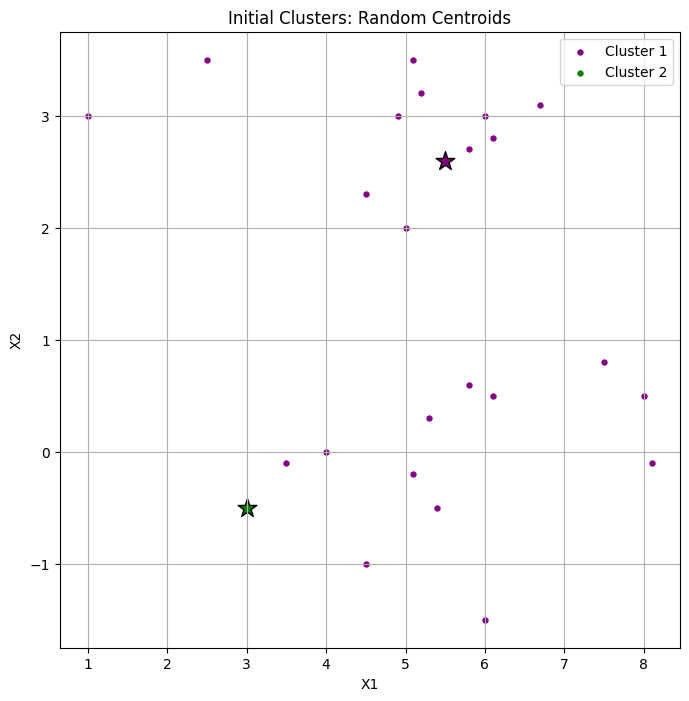

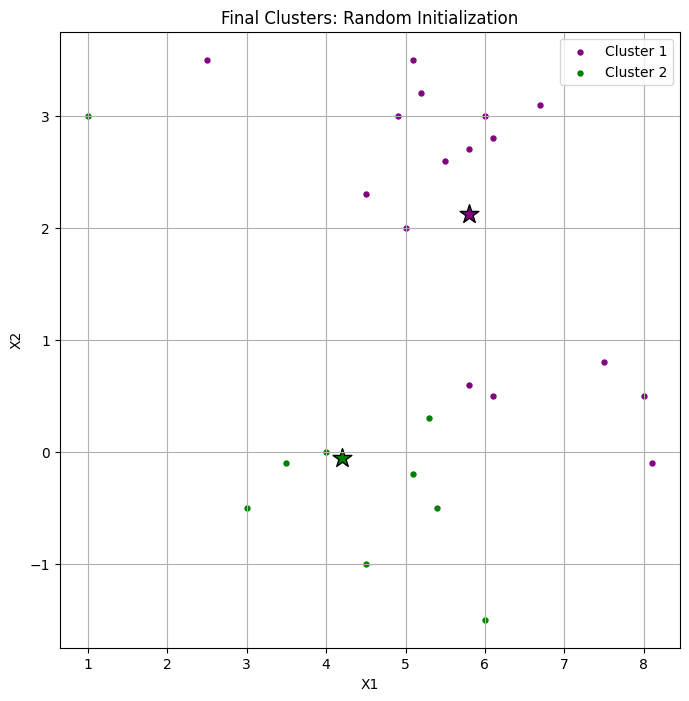

In [362]:
plot_clusters(X, random_centroids, np.zeros(len(X), dtype=int), 'Initial Clusters: Random Centroids')
plot_clusters(X, final_centroids_random, cluster_assignments_random, 'Final Clusters: Random Initialization')


### **Initial Clusters with Random Centroids**
- In the first plot, random centroids are initialized, represented as large crosses (red for Cluster 1, blue for Cluster 2). 
- The clustering algorithm has assigned all points to their nearest initial centroid. This results in arbitrary cluster memberships, as these centroids were not informed by the data's underlying structure.

### **Final Clusters after Random Initialization**
- The second plot illustrates the final clustering after the algorithm converges. The centroids have shifted to positions that minimize intra-cluster distances, effectively partitioning the data points into more coherent clusters.
- Notably, the clusters now reflect the natural grouping of the data, with red and blue points grouped around their respective centroids.

### **Comparison**
1. **Initialization**: The first stage depends heavily on the random centroid initialization, which can lead to poor initial assignments, as shown in the first plot.
2. **Convergence**: The final clusters demonstrate the algorithm's ability to iteratively improve from the initial random state. The centroids have relocated to positions that better represent the true structure of the dataset.
3. **Cluster Quality**: The initial clustering appears arbitrary and disorganized, while the final clustering aligns with the natural separation in the data.

This comparison emphasizes the importance of centroid initialization in clustering algorithms like K-Means. While random initialization may lead to suboptimal starting points, the iterative nature of the algorithm allows it to refine the clusters effectively.

### d) Determine the optimal number of clusters, M, using the Elbow method. Plot the Within-Cluster Sum of Squares (WCSS) against different values of k to find the elbow point. Randomly initialize M centroids, perform clustering and plot the resulting clusters

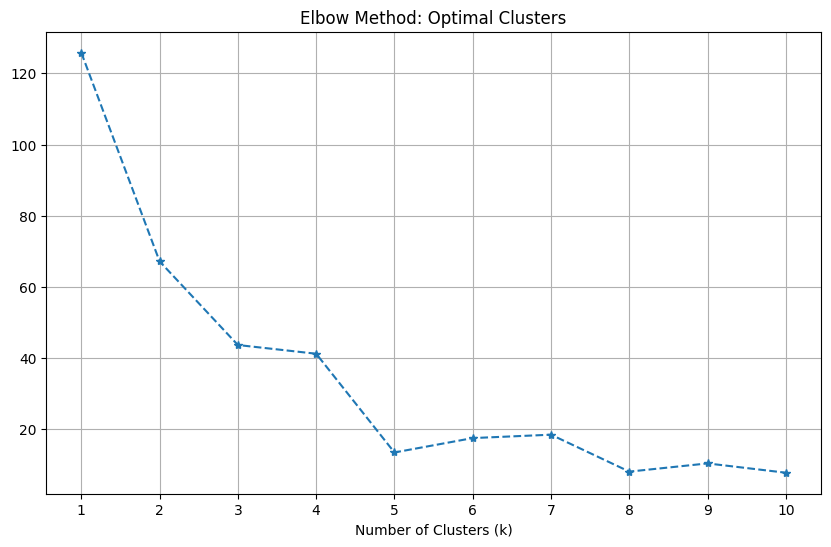

Within-Cluster Sum of Squares (WCSS) for different k values: [np.float64(125.80560000000001), np.float64(67.15833333333335), np.float64(43.662), np.float64(41.207499999999996), np.float64(13.460333333333333), np.float64(17.504083333333334), np.float64(18.455555555555552), np.float64(8.07852380952381), np.float64(10.383809523809525), np.float64(7.768333333333333)]


In [363]:
def initialize_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def compute_distances(X, centroids):
    return np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

def calculate_wcss(X, centroids):
    distances = compute_distances(X, centroids)
    return sum(np.min(distances, axis=1)**2)

def k_means(X, initial_centroids, k):
    centroids = initial_centroids
    while True:
        distances = compute_distances(X, centroids)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

def method_elbow(X, max_k=10):
    WCSS = []
    for k in range(1, max_k + 1):
        initial_centroids = initialize_centroids(X, k)
        centroids, labels = k_means(X, initial_centroids, k)
        WCSS.append(calculate_wcss(X, centroids))
    return WCSS

def plot_elbow(wcss, max_k):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), wcss, marker='*', linestyle='--')
    plt.title("Elbow Method: Optimal Clusters")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("")
    plt.xticks(range(1, max_k + 1))
    plt.grid(True)
    plt.savefig('elbow_method.png')
    plt.show()

wcss = method_elbow(X, max_k=10)
plot_elbow(wcss, max_k=10)
print("Within-Cluster Sum of Squares (WCSS) for different k values:", wcss)


Components of the Graph:
X-Axis: Represents the number of clusters (k).
Y-Axis: Represents the Within-Cluster Sum of Squares (WCSS) or inertia, which measures the total variance within each cluster. A lower WCSS indicates better clustering.
Key Observations:
As k increases, the WCSS decreases because adding more clusters reduces the variance within each cluster.
Initially, the WCSS decreases rapidly as k increases, but the rate of decrease slows down at a certain point, creating an "elbow" shape in the graph.
Purpose of the Elbow Method:
The goal is to identify the "elbow point" in the graph, which indicates the optimal number of clusters. At this point:

Adding more clusters beyond this value yields diminishing returns.
The clustering solution balances simplicity and effectiveness.
Interpretation of the Graph:
In this specific graph:

The elbow is most likely located at k = 5. This is the point where the rate of decrease in WCSS starts to level off significantly.
Beyond k = 5, the reduction in WCSS becomes marginal, indicating that adding more clusters does not provide substantial improvement.
Conclusion:
The optimal number of clusters for the data in this graph is 5.